<h2 align="center">USING MACHINE LEARNING TOOLS 2020</h2>





<b>Name: Arpit Garg


ID: A1784072


Assignment 1: Wine Quality</b>


<h3 align = 'center'>GENERAL INSTRUCTIONS:</h3>


Predicting Wine Quality using different models. 

The original source for this data is the UCI repository but we used modified version of this (hosted by MyUni). 

For each model error is calculated. 

The main goal of this assignment is to explore sklearn, pandas, matplotlib and other popular libraries.

Some values can differ if we re-run the assignments.

Different approaches are referred from internet.

<h3 align = 'center'>LIBRARIES INFORMATION:</h3>
    
Pandas: For data manipulation and analysis
    
Numpy: For handling arrays and matrices
    
Matplotlib: It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter etc.

Seaborn: For drawing attractive and informative statistical graphics

Sklearn: Provides Simple and efficient tools for data analysis.
    
Math: For providing basic mathematical operations

In [121]:
#importing all the required libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


 <h3 align = 'center'>!!!!!!!! TASK 1 !!!!!!!!</h3>
<h3 align = 'center'>Load and Pre-process the data set</h3>
    

Pandas: read_csv function will read the whole csv file

'File name': File name with the location if required( if at different location)

(Here: 'winedata.csv')
        
sep is the parameter which will define the separater(delimeter) used in file while reading the file 

(Here: ';')
        
error_bad_lines is the parameter and is of boolean type (True/False).
Lines with too many fields (e.g. a csv line with too many commas) will by default cause an  exception to be raised, and no DataFrame will be returned. 
If False, then these “bad lines” will dropped from the DataFrame that is returned.

(Here:False) 

In [122]:
#inbuilt pandas library to read csv files and store it in dataframe df
df = pd.read_csv('winedata.csv', sep=';', error_bad_lines=False)

b'Skipping line 3149: expected 12 fields, saw 13\nSkipping line 4821: expected 12 fields, saw 13\n'



Pandas:info()

This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [123]:
#displaying the information of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 12 columns):
fixed acidity           4891 non-null float64
volatile acidity        4891 non-null object
citric acid             4843 non-null object
residual sugar          4886 non-null object
chlorides               4890 non-null object
free sulfur dioxide     4888 non-null object
total sulfur dioxide    4889 non-null object
density                 4890 non-null object
pH                      4890 non-null object
sulphates               4892 non-null object
alcohol                 4890 non-null object
quality                 4892 non-null object
dtypes: float64(1), object(11)
memory usage: 459.1+ KB




OBSERVATION:


By observing the above information we can say that initally we have 12 Data columns and except of fixed_acidity every column is of object type and only fixed_acidity is of type float64 and approximately each column contains values betwen 4843 to 4892 and range index is 4896 entries with memory usage of 459.1+KB

IMP: All the observations mentioned till now are before preprocessing of data.



-------------------------------------------------------------------------------------------------------------



Pandas:describe()
    
Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.



In [124]:
#displaying stats of the dataframe
df.describe()

,fixed acidity
count,4891.000000
mean,6.855030
std,0.844023
min,3.800000
25%,6.300000
50%,6.800000
75%,7.300000
max,14.200000




<b>OBSERVATION:</b>

As from the output of info we can see that only fixed_acidity is of numerical type so describe can perform its stats operations on that column only so showing only results of that column. 



To display the results of all columns we first need to convert all the columns to numeric


------------------------------------------------------------------------------------------------------------------



To convert all the colums to numberic we will use:


    
Pandas:to_numeric()


The default return dtype is float64 or int64 depending on the data supplied. Use the downcast parameter to obtain other dtypes.


With parameter errors: If ‘coerce’ (Here), then invalid parsing will be set as NaN.


In [125]:
#converting all the columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

In [126]:
#displaying the information of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 12 columns):
fixed acidity           4891 non-null float64
volatile acidity        4890 non-null float64
citric acid             4842 non-null float64
residual sugar          4885 non-null float64
chlorides               4889 non-null float64
free sulfur dioxide     4887 non-null float64
total sulfur dioxide    4888 non-null float64
density                 4889 non-null float64
pH                      4889 non-null float64
sulphates               4891 non-null float64
alcohol                 4889 non-null float64
quality                 4794 non-null float64
dtypes: float64(12)
memory usage: 459.1 KB




<b>OBSERVATION:</b>
    
Now all the columns are of type float. So we can apply describe on it. 


In [127]:
#displaying stats of the dataframe
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4891.000000,4890.000000,4842.000000,4885.000000,4889.000000,4887.000000,4888.000000,4889.000000,4889.000000,4891.000000,4889.000000,4794.000000
mean,6.855030,0.278244,0.334292,6.395609,0.045779,35.329036,138.406199,0.994028,3.188116,0.489812,10.514211,5.876929
std,0.844023,0.100828,0.120942,5.074504,0.021863,17.014816,42.506828,0.002992,0.150950,0.114096,1.230556,0.884692
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991730,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000




<b>OBSERVATION:</b>
    
We can see the stats according to each column


-----------------------------------------------------------------------------------------------------------------

Pandas: head()

This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

Parameters

    
n  :   int, default 5

Number of rows to select.


        
    

In [128]:
#displaying first 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


---------------------------------------------------------------------------------------------------------------

<b>For calculating number of wines included in the dataset we need to calculate the number of rows.</b>


For calculating number of rows we will use:
    
Pandas: shape

This will return two arguments first is the number of rows and second number of columns

(Here, We need only number of rows)


In [129]:
#r for rows and c for columns, calculating the shape 
r , c = df.shape
print('Number of wines: ',r)

Number of wines:  4896




<b>OBSERVATION:</b>
    
    
Before preprocessing, there are 4896 wines included in the dataset.


-----------------------------------------------------------------------------------------------------------------

<b>To answer if all the wines are unique we will use</b> 


Pandas: duplicated()


df.duplicated(subset='one', keep='first').sum()

where

subset : column label or sequence of labels(by default use all of the columns)

keep : {‘first’, ‘last’, False}, default ‘first’

first : Mark duplicates as True except for the first occurrence.
last : Mark duplicates as True except for the last occurrence.
False : Mark all duplicates as True.


Sum(): Will calculate the number of these rows


In [130]:
#calculating the duplicate wines 
print('Number of repeated wines: ',df.duplicated().sum())

Number of repeated wines:  884


In [131]:
#calculating the unique wines
print('Number of unique wines: ',df.shape[0]-df.duplicated().sum())

Number of unique wines:  4012




<b>OBSERVATION:</b>
    
So it means there are 884 duplicate rows means 884 are same type of wines and 4012 are unique wines.

<b>EXPLAINATION:</b>

df.shape[0] : Will give the total number of wines

df.duplicated().sum(): Will give the wines that are ot unique
    
So the subtraction of above two will give the number of unique wines.

Sum(): Will calculate the number of these rows


------------------------------------------------------------------------------------------------------------------

<b>To calculate the missing or invalid values</b> 

Pandas: isna()

Detect missing values.

Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values.

Sum(): Will calculate the number of these rows

In [132]:
#calculating the total nan values according to each column
df.isna().sum()

fixed acidity             5
volatile acidity          6
citric acid              54
residual sugar           11
chlorides                 7
free sulfur dioxide       9
total sulfur dioxide      8
density                   7
pH                        7
sulphates                 5
alcohol                   7
quality                 102
dtype: int64



<b>OBSERVATION:</b>

We can see the sum of nan values in each column and can observe that they are maximum in quality column and minimum in fixed_acidity and sulphates.

------------------------------------------------------------------------------------------------------------------


<b>For Scaling</b>: We will see the minimum and maximum value of each attribute.

So, we will use:

Pandas: min()

Return the minimum of the values for the requested axis.
    
Pandas: max()

Return the maximum of the values for the requested axis.

In [133]:
#calculating minimum of each column
df.min()

fixed acidity           3.80000
volatile acidity        0.08000
citric acid             0.00000
residual sugar          0.60000
chlorides               0.00900
free sulfur dioxide     2.00000
total sulfur dioxide    9.00000
density                 0.98711
pH                      2.72000
sulphates               0.22000
alcohol                 8.00000
quality                 3.00000
dtype: float64

In [134]:
#calculating maximum of each column
df.max()

fixed acidity            14.20000
volatile acidity          1.10000
citric acid               1.66000
residual sugar           65.80000
chlorides                 0.34600
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   1.03898
pH                        3.82000
sulphates                 1.08000
alcohol                  14.20000
quality                   9.00000
dtype: float64



<b>OBSERVATION:</b>


    
We can observe that scale of each attributes are as follows:

fixed_acidity: 3.8-14.2

volatile_acidity: 0.08 - 1.1

citric acid: 0.00-1.66

residual sugar:0.6-65.8

chlorides: 0.009-0.346

free sulfur dioxide:2-289.0

total sulfur dioxide:9-440

density:0.98711-1.03898

pH:2.72:3.82

sulphates:0.22:1.08

alcohol: 8-14.2

quality:3-9

    
From the above scale we can observe that scale of different attributes are not equal. 

All the observations are before preprocessing we can scale the whole data using sklearn:
    
sklearn.preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)

But not used here as it is increasing the error values that means scaling is not required on this data. 

-----------------------------------------------------------------------------------------------------------------

<b>SIMPLE PREPROCESSING TASKS:</b>

    
For simple preprocessing tasks we are replacing all nan values with the mean of each attributes.(imputation: Mean)

For this we use:

Pandas: fillna()

Fill NA/NaN values using the specified method.

Parameter: inplace: bool, default False

If True, fill in-place. Note: this will modify any other views on this object (e.g., a no-copy slice for a column in a DataFrame).


We use mean value for imputation because by replacing na values with mean will not create any effect on mathematical analysis of that attribute.



In [135]:
#replacing na with mean value 
df.fillna(df.mean(), inplace=True)

In [136]:
#verifying if our dataset still have any na values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<b>OBSERVATION:</b>
    
We can see that now now attributes have na values.
By “missing” we simply mean NA (“not available”) or “not present for whatever reason”. Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed.


------------------------------------------------------------------------------------------------------------------

We want to predict the quality so Quality will be the output and all the other columns will be the input.

Creating two set one for the input and next for the output

In [137]:
#input (excluding quality column)
data_input = df[[i for i in list(df.columns) if i != 'quality']]

In [138]:
#output (considering only quality column)
data_output = df['quality']


<b>OBSERVATION:</b>
    
We have separated our data into input and output.

-----------------------------------------------------------------------------------------------------------------

<h4 align='center'>After preprocessing again answering the above questions:</h4>

<b>1. Number of wines included</b>

In [139]:
#r for rows and c for columns, calculating the shape 
r , c = df.shape
print('Number of wines (after preprocessing data):',r)

Number of wines (after preprocessing data): 4896


4896 wines included



<b>2. Number of unique wines</b>

In [140]:
#calculating the duplicate wines 
print('Number of repeated wines(after preprocessing data):', df.duplicated().sum())

Number of repeated wines(after preprocessing data): 884


In [141]:
#calculating the unique wines
print('Number of unique wines(after preprocessing data): ', df.shape[0]-df.duplicated().sum())

Number of unique wines(after preprocessing data):  4012


882 wines are repeated 
4012 are unique wines 


<b>3. Finding any missing values</b>

In [142]:
#verifying if our dataset still have any na values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in data.


All the above three observations shown above are after preprocessing the data.
And scaling is not done because its increasing error rate in our data. So scaling is still the same and scales are not still equal for different attributes


                                        
<h3 align = 'center'>!!!!!!!! TASK 2 !!!!!!!!</h3>
<h3 align = 'center'>Visualise the Data</h3>


For plotting frequency histogram of each attribute we use:

matplotlib.pyplot.figure()

Parameter: figsize : (float, float), optional, default: None

width, height in inches. If not provided, defaults to rcParams["figure.figsize"] = [6.4, 4.8] = [6.4, 4.8].

matplotlib.pyplot.gca(kwargs) :
Get the current Axes instance on the current figure matching the given keyword args, or create one.

Pandas: hist()
A histogram is a representation of the distribution of data. This function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.


/home/arpit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4452417898>,
      dtype=object)

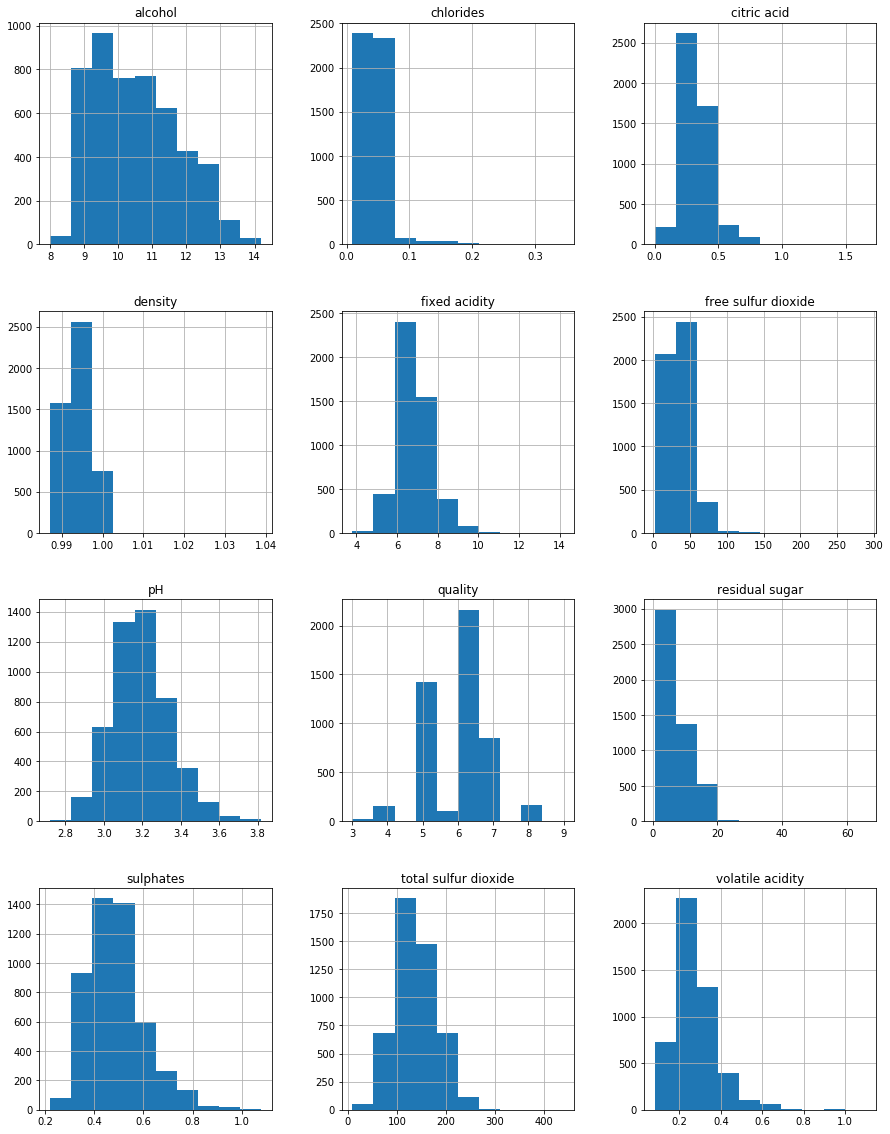

In [143]:
#plotting the frequency histograms of each attribute
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)



<b>OBSERVATION:</b>
    
1. Alcohol: Frequency of graph is normally distributed in the range with the maximum value between 9 and 10 and range between 8 and 15 on x-axis and 0 to 1000 on y-axis.

2. Chlorides: We can observe that graph of chloride is left focused (right-skewed)and mostly values (more than 2000 values) lies between 0 and 0.1.

3. Citric acid: We can observe that this is also left focused (right-skewed) amd mostly values lie between 0 and 0.5.

4. Density: We can observe that this is also left focused (right-skewed) amd mostly values lie between 0.99 and 1.

5. Fixed Acidity: We can observe that mostly it lies between 6 and 8.

6. Free sulphur dioxide: We can observe that this data is also left focused (right skewed) and mostly its values lie between 0 to 60.

7. pH: We can observe that all the values in this column is normally distributed etween the range of 0 to 4.

8. Quality: We can observe that the values in te quality is not showing any pattern but we can say that mostly values lies between 6 and 7.

9. Residual Sugar: We can observe that this data is also left-focused (right skewed) and mostly its values lie between 0 to 20.

10. Sulpahtes: We can observe that this graph is approximately normalised between 0.2 and 1.

11. Total Sufur dioxide: We can observe that this graph is somewhat left focused (right skewed) and mostly values lies between 100 and 200.

12. Volatile acidity: We can observer that this graph is also left focused(right skewed) and mostly values lies between 0.2 and 0.4.

General observation is that mostly graphs are left focused or not normalised. This is beacause the attributes are not scaled in the preprocessing section (not needed in this dataset). 

------------------------------------------------------------------------------------------------------------------

We are trying to predict the quality. 

We need to find the correlation between each attribute and quality.



<b>Why Correlation ??</b>
    


The correlation coefficient (ρ) is a measure that determines the degree to which two variables' movements are associated. The most common correlation coefficient, generated by the Pearson product-moment correlation, may be used to measure the linear relationship between two variables. However, in a non-linear relationship, this correlation coefficient may not always be a suitable measure of dependence.

Correlation coefficients are used to measure the strength of the relationship between two variables.

Positive correlation is a relationship between two variables in which both variables move in tandem—that is, in the same direction.

Negative correlation or inverse correlation is a relationship between two variables whereby they move in opposite directions. 



For finding the correlation between attributes we used:

Pandas: corr()

Compute pairwise correlation of columns, excluding NA/null values.



In [144]:
#calculating the correlation of each attribute with the quality
corr = df.corr()
corr = corr['quality']

In [145]:
#arranging them in increasing order on the basis of their absolute values
corr.reindex(corr.abs().sort_values().index)

free sulfur dioxide     0.007114
citric acid            -0.007292
sulphates               0.052997
residual sugar         -0.096690
pH                      0.097506
fixed acidity          -0.114036
total sulfur dioxide   -0.173462
volatile acidity       -0.196791
chlorides              -0.206581
density                -0.301418
alcohol                 0.425486
quality                 1.000000
Name: quality, dtype: float64


<b>OBSERVATION:</b>
    
From the above calculated data we can see that the most correlated attributes with quality are:
    
    1. Chlorides :  -0.206581
    2. Density  :   -0.301418
    3. Alcohol  :    0.425486
        
We can see that Chlorides and Desity are negatively correlated and Alcohol is positively correlated means when the Chlorides and density decreases and Alcohol increases we will get the high quality.

------------------------------------------------------------------------------------------------------------------
Displaying HeatMap on the basis of correlation
A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors. 

For HeatMap we use:
sns.heatmap()

seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, kwargs)

Plot rectangular data as a color-encoded matrix.


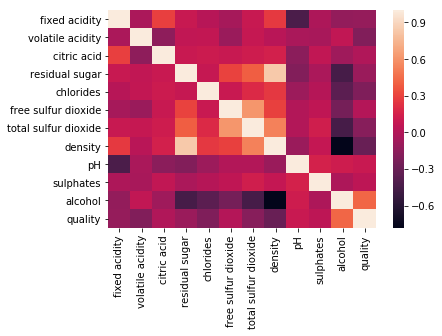

In [146]:
#plotting heatmap to compare correlation
sns.heatmap(df.corr())
plt.show()

------------------------------------------------------------------------------------------------------------------
Displaying the scatter plot for these three high correlated values.

For scatter graph we use:
    
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, kwargs)

Parameter:

alpha : scalar, optional, default: None
The alpha blending value, between 0 (transparent) and 1 (opaque).


A scatter plot of y vs x with varying marker size and/or color.

Text(0, 0.5, 'Quality')

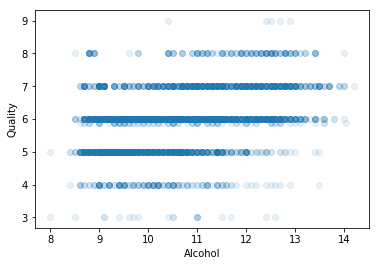

In [147]:
#Scatter plot for alcohol
plt.scatter(data_input['alcohol'], data_output, alpha=0.1)
plt.xlabel('Alcohol')
plt.ylabel('Quality')

<b>OBSERVATION:</b>

    
From the above scatter plot it can be observed that value of alcohol is uniformly distributed with most of the values lies between 5 and 7 quality scale. Data is approximately normalised

Text(0, 0.5, 'Quality')

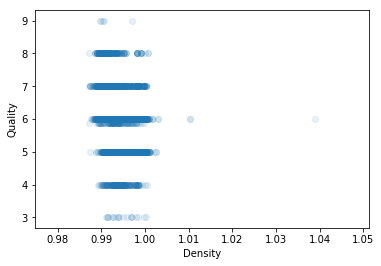

In [148]:
#Scatter plot for Density
plt.scatter(data_input['density'], data_output, alpha=0.1)
plt.xlabel('Density')
plt.ylabel('Quality')

<b>OBSERVATION:</b>
    
From the above scatter plot it can be observed that  mostly density values lies between 0.99 and 1 and other all can be treated as outliers. Data is not normalised.

Text(0, 0.5, 'Quality')

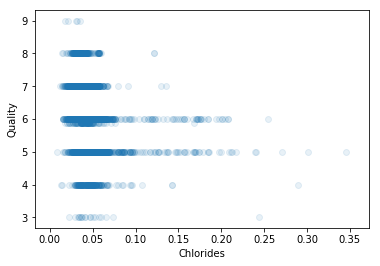

In [149]:
#Scatter plot for chlorides
plt.scatter(data_input['chlorides'], data_output,alpha=0.1)
plt.xlabel('Chlorides')
plt.ylabel('Quality')

<b>OBSERVATION:</b>

From the above scatter plot it can be observed that mostly values lies between 0 and 0.10 for chlorides and between 4 to 8 for quality. 
Data is not normalised.


                                        
<h3 align = 'center'>!!!!!!!! TASK 3 !!!!!!!!</h3>
<h3 align = 'center'>Predicting wine quality: baseline</h3>



To predict the quality of wine, we will use regression. We pretend that quality is the real number.

We will use root mean square error (rmse) as our error function when evaluationg our predictor.

<b>Why RMSE?</b>

The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

Refer the RMSE formula from this link: https://www.statisticshowto.datasciencecentral.com/rmse/

------------------------------------------------------------------------------------------------------------------

For all the future process, we first need to split our data into train and test sets. We need to randomly select 80% as train data and 20% as the test data.

For implementing this we use sklearn split:

sklearn.model_selection.train_test_split(arrays,options)
Split arrays or matrices into random train and test subsets

Parameters:


arrayssequence of indexables with same length / shape[0]
Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.


test_size float, int or None, optional (default=None)
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.


train_size float, int, or None, (default=None)
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.


random_state int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.


In [150]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.2, random_state=42)


Simple estimation method 

(Baseline Performance)

Steps:
    
    1. Finding median value of training set
    
    2. Use that predicted value so need to create array of same value size of Y train

For step 1 we use:

Pandas: median()

DataFrame.median(self, axis=None, skipna=None, level=None, numeric_only=None, kwargs)

Return the median of the values for the requested axis.


For step 2 we use:

Numpy: full()

numpy.full(shape, fill_value, dtype=None, order='C')

Return a new array of given shape and type, filled with fill_value.
    

In [151]:
#calculating median value
median = y_train.median()

In [152]:
#creating array of same value and of same size 
med_ar = np.full(y_train.shape,median)


Now we need to calculate the Root Mean square Errors (RMSE) for the above data.

To calculate RMSE we use sklearn to calculate Mean square error (MSE) and then we use square root to calculate the RMSE

In [153]:
#importing library to calculate mean square error
from sklearn.metrics import mean_squared_error

In [154]:
#Calculating RMSE
rm = sqrt(mean_squared_error(y_train, med_ar))
print('Rmse: ',rm)

Rmse:  0.8914898335566815



<b>OBSERVATION:</b>
    
For the baseline method we get 0.8914898335566815 as the RMSE.
Smaller value of RMSE is better but here we are only taking baseline conditions and we have not predicted any value just calculated the RMSE on the basis of the median so we are getting so high value of RMSE.

NOTE: It is trained and tested in training set. (As mentioned in the task)


------------------------------------------------------------------------------------------------------------------

<b>Why do we use regression rather than classification to predict quality? Would there be any advantages to treating this as a classification problem instead?</b>


Classification is basically used for predicting the discrete labels and regression is used for predicting the continuous quantity. In this dataset we want to predict the quality so we use regression. 

In some cases we can take regression probelm as classification where the quantity can be converted into discrete labels. For example in this case we can divide the classes of wines into different categories like:
    if (3<=quality<6) : Class 0
    else if (6<=quality<=9) :Class 1
    
These will be helpful when we need to divide wines into different categories. This is also called discretization where the target variable is the classification where the labels have an ordered relationship. If we take the nature of predicted data it should be ordered in this dataset that's why its better to use regression otherwise if we want nature of predicted data to unordered we can consider classification. 


But apart from the above situation I think this problem must be treated as regression problem only:

Having +2 decision value means the prediction is very confident that the sample belongs to a positive class  (consider the case in SVM or any binary classification). If the sample indeed belongs to the positive class, it indicates the predictor is perfectly functional. At least, it should be as good as a predictor giving you +1 decision score. However, if we use classification as regression, giving +2 will be heavily penalized since it is larger than 1. This is an undesirable property. Thus, it puts unnecessary requirements to the predicted value.

General outcome: When we need to group some data, classification is the suitable approach but whe we need to predict the output regression is much better. So according to me, regression is better approach for predicting values in the wine dataset than classification. 





                                        
<h3 align = 'center'>!!!!!!!! TASK 4 !!!!!!!!</h3>
<h3 align = 'center'>Predicting wine quality</h3>

<h4 align='center'>Linear Regression:</h4>

Linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable.
    
The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.
    
    
    
    



------------------------------------------------------------------------------------------------------------------

(For this task)

Steps for Linear Regression:

1. First we need to implement Linear Regression model to training data.

2. Apply to training data 

3. Calculate the RMSE



------------------------------------------------------------------------------------------------------------------


Step 1: To implement Linear Regression Model, we will use sklearn:

sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.



In [155]:
#importing sklearn library for Linear Regression
from sklearn.linear_model import LinearRegression

In [156]:
#creating model
l_model = LinearRegression()

After defining the model we will fit the training data where X_train is the input and y_train is the output

In [157]:
#fitting the model
l_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


Step 2: After fitting the data, we need to predict the output.
It's already mentioned that we need to predict on the training data only 

In [158]:
#applying and predicting on the training data
l_predicted = l_model.predict(X_train)

Displaying the predicted values

In [159]:
#displaying output
l_predicted

array([5.89581461, 5.85821855, 6.6465694 , ..., 6.11631586, 6.36194534,
       5.90671221])

OBSERVATION:

The above output is in array for so we need to convert it in dataframe. 

For this, we use:

Pandas(): pd.DataFrame()


In [160]:
#converting it to dataframe from array
l_predicted = pd.DataFrame(l_predicted)

In [161]:
#displaying output
l_predicted

,0
0,5.895815
1,5.858219
2,6.646569
3,6.556320
4,5.879552
...,...
3911,5.758183
3912,5.943317
3913,6.116316
3914,6.361945


Step 3: Now, we need to calculate the RMSE on the predicted values and y_train (actual values). 
As discussed above, using sklearn library to calculate mean squared error and the square root of this value to to find RMSE

In [162]:
#Calculating RMSE
rmse_ltest = sqrt(mean_squared_error(l_predicted,y_train))
print('Rmse: ',rmse_ltest)

Rmse:  0.7529640453335492


<b>OBSERVATION:</b>

We get 0.7529640453335492 RMSE value for the Linear Regression model.


Plotting graph between actual and predicted values

For this scatter graph is used where x-axis represents predicted values and y-axis represents actual values.

For plotting this matplotlib is used

Text(0.5, 0, 'Predicted Values')

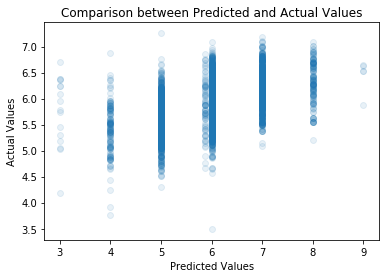

In [163]:
#Plotting scatter graph between actual and predicted values
plt.scatter(y_train, l_predicted,alpha=0.1)
plt.title("Comparison between Predicted and Actual Values")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

<b>OBSERVATION:</b>

In the above graph, we can easily observe the significant difference between actual and predicted values that's why we are getting large value of RMSE

-----------------------------------------------------------------------------------------------------------------

<h4 align='center'>K Nearest Neighbors Regression (KNN Regression):</h4>

K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions).
A simple implementation of KNN regression is to calculate the average of the numerical target of the K nearest neighbors.  Another approach uses an inverse distance weighted average of the K nearest neighbors. 

-----------------------------------------------------------------------------------------------------------------

(For this task)

Steps for KNN Regression:

    1. First we need to implement KNN Regression model to training data.

    2. Apply to training data

    3. Calculate the RMSE


-----------------------------------------------------------------------------------------------------------------

Step 1: To implement KNN Model, we will use sklearn:

sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, kwargs)

Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.


In [164]:
#importing sklearn library for K Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor

Before fitting the model we need to select the value of k and we should select that value of k which will give the least RMSE.

So for selecting the value of k, we will use ELBOW method. This method will help to select the optimal value of k.
We are assuming that we will find optimal k value between 1 and 20.

Step 2: Using the ELBOW method we will all this model to our training data

Step 3: Calculating RMSE and appending it for different values of k

In [165]:
#applying ELBOW method and calculating different rmse for each value of k between 1 to 20
k_range = range(1, 20)
errors = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_predicted = knn.predict(X_train)
    errors.append(sqrt(mean_squared_error(k_predicted,y_train)))

We can plot the graph between k values ans errors and after plotting we can observe that minimum error is when k value is 1 

Text(0, 0.5, 'Errors')

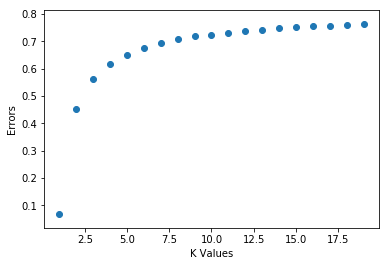

In [166]:
#Scatter plot for k values
plt.scatter(k_range, errors)
plt.xlabel('K Values')
plt.ylabel('Errors')

In [167]:
#displaying error list for k values between 1 to 20
errors

[0.06790400670730003,
 0.45166433394009475,
 0.5613134149366484,
 0.616099551319154,
 0.6502592022558201,
 0.6746813239921651,
 0.6942935196231842,
 0.7072446081781361,
 0.7180795898845659,
 0.7248369152605169,
 0.7315070260811994,
 0.7364806523528575,
 0.7436565506673242,
 0.7498214693461952,
 0.753689426214058,
 0.7546729725214443,
 0.7578135000991371,
 0.7607306082623422,
 0.7637364052521413]

Above all the error list represents error for values of k between 1 to 20. Now we need to select the minimum value from the list and consider that k value for our knn regression. 

For calculating minimum from the list we will use:

Numpy: argmin()

numpy.argmin(a, axis=None, out=None)

Returns the indices of the minimum values along an axis.

In [168]:
#Selecting k value from above list which gives minimum RMSE
index_min = np.argmin(errors) +1
print('Optimal k-value: ',index_min)

Optimal k-value:  1


Plotting the graph for k when we are getting minimum RMSE. Here k = 1.

Plotting graph between actual and predicted values

For this scatter graph is used where x-axis represents predicted values and y-axis represents actual values.

For plotting this matplotlib is used

RMSE:  0.06790400670730003


Text(0.5, 0, 'Predicted Values')

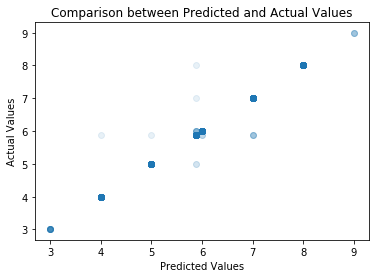

In [169]:
#running knn for optimal k value (k=1)
knn_optimal = KNeighborsRegressor(n_neighbors=1)
knn_optimal.fit(X_train, y_train)
kopt_predicted = knn_optimal.predict(X_train)
rmse_kopt= sqrt(mean_squared_error(y_train, kopt_predicted))
print('RMSE: ',rmse_kopt)
#Plotting scatter graph between actual and predicted values
plt.scatter(y_train, kopt_predicted,alpha=0.1)
plt.title("Comparison between Predicted and Actual Values")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")


<b>OBSERVATION:</b>

In the above graph, we can easily observe that there is no significant difference between actual and predicted values that's why we are getting low value of RMSE i.e. 0.06790400670730003.


-----------------------------------------------------------------------------------------------------------------

<h4 align='center'>Decision Tree:</h4>

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

The core algorithm for building decision trees called ID3 which employs a top-down, greedy search through the space of possible branches with no backtracking. The ID3 algorithm can be used to construct a decision tree for regression by replacing Information Gain with Standard Deviation Reduction. 	


---------------------------------------------------------------------------------------------------------------

(For this task)

Steps for Decision Tree Regression:

    1. First we need to implement Decision Tree Regression model to training data.

    2. Apply to training data

    3. Calculate the RMSE


Step 1: To implement Decision Tree Model, we will use sklearn:

sklearn.tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)


A decision tree regressor.


In [170]:
#importing sklearn library for Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [171]:
#creating model
tree = DecisionTreeRegressor()

In [172]:
#Fitting the model
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Step 2: After fitting the data, we need to predict the output.
It's already mentioned that we need to predict on the training data only 

In [173]:
#Predicting with the trained model
tree_predicted = tree.predict(X_train)

Step 3: Now we need to calculate the RMSE 

In [174]:
#calculating the RMSE
rmse_tree = sqrt(mean_squared_error(y_train, tree_predicted))

In [175]:
#displaying value of RMSE for Decision Tree
print('Rmse: ',rmse_tree)

Rmse:  0.048456189158340456


From the above results we can observed that value of RMSE for decision tree is 0.048456189158340456

Plotting graph between actual and predicted values

For this scatter graph is used where x-axis represents predicted values and y-axis represents actual values.

For plotting this matplotlib is used

Text(0.5, 0, 'Predicted Values')

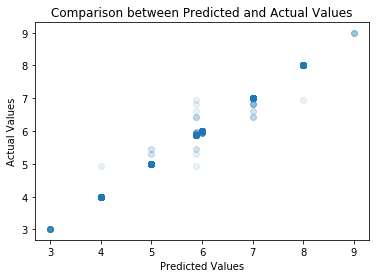

In [176]:
#Plotting scatter graph between actual and predicted values
plt.scatter(y_train, tree_predicted,alpha=0.1)
plt.title("Comparison between Predicted and Actual Values")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

<b>OBSERVATION:</b>

In the above graph, we can easily observe that there is no significant difference between actual and predicted values that's why we are getting low value of RMSE

------------------------------------------------------------------------------------------------------------------
Now we get the RMSE of three different models. We need to compare the error using graph. So we are using bar plot.

For this we used:

matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, kwargs)

Make a bar plot.

The bars are positioned at x with the given alignment. Their dimensions are given by width and height. The vertical baseline is bottom (default 0).

Each of x, height, width, and bottom may either be a scalar applying to all bars, or it may be a sequence of length N providing a separate value for each bar.

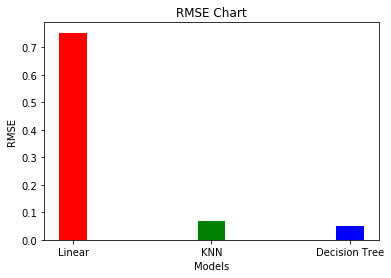

In [177]:
#containing the RMSE error of different models  
Err = [rmse_ltest, rmse_kopt, rmse_tree]
X = [1,2,3]
#plotting the bar chart
plt.bar(X, Err, tick_label = ['Linear','KNN','Decision Tree'], width = 0.2, color = ['red', 'green','Blue']) 
plt.xlabel('Models') 
# naming the y-axis 
plt.ylabel('RMSE') 
# plot title 
plt.title('RMSE Chart') 
# function to show the plot 
plt.show() 

<b>OBSERVATION:</b>

From the above graph it can be observed that Linear contain high Rmse  (more than 0.7) then KNN (approx 0.06) then Decision Tree (approx 0.04).

<b>How the errors compare?</b>

Linear Regression have high value of RMSE because it is having direct relationship with the data. Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. However, this is not the case with KNN and Decision Tree. So, KNN is better when the data is scaled

The k-nearest neighbor algorithm relies on majority voting based on class membership of 'k' nearest samples for a given test point. The nearness of samples is typically based on Euclidean distance. Notice, how without normalization, all the nearest neighbors are aligned in the direction of the axis with the smaller range, i.e. x1 leading to incorrect output. But for Decision Tree we do not need any scaling.

There are models that are independent of the feature scale. For example, tree-based algorithms (decision trees and random forests) are not affected. A node of a tree partitions your data into 2 sets by comparing a feature (which splits dataset best) to a threshold value. There's no regularization for the threshold (because one should keep height of the tree small), so it's not affected by different scales.
    


                                        
<h3 align = 'center'>!!!!!!!! TASK 5 !!!!!!!!</h3>
<h3 align = 'center'>Cross Validation</h3>

<b>Why Cross Validation?</b>

This process of deciding whether the numerical results quantifying hypothesized relationships between variables, are acceptable as descriptions of the data, is known as validation. Generally, an error estimation for the model is made after training, better known as evaluation of residuals. In this process, a numerical estimate of the difference in predicted and original responses is done, also called the training error. However, this only gives us an idea about how well our model does on data used to train it. Now its possible that the model is underfitting or overfitting the data. So, the problem with this evaluation technique is that it does not give an indication of how well the learner will generalize to an independent/ unseen data set. Getting this idea about our model is known as Cross Validation.



<b>K Fold Cross Validation:</b>
    
In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. Interchanging the training and test sets also adds to the effectiveness of this method. As a general rule and empirical evidence, K = 5 or 10 is generally preferred, but nothing’s fixed and it can take any value.

------------------------------------------------------------------------------------------------------------------

For performing 10 fold cross validation on each model, we use sklean:

sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)

Evaluate a score by cross-validation

In [178]:
#importing library
from sklearn.model_selection import cross_val_score


Need to perform cross validation for each model means:
    
1. Linear Regression

2. KNN Regression 

3. Decision Tree


------------------------------------------------------------------------------------------------------------------


1. Applying 10 fold cross validation for Linear Regression:

In [179]:
#applying 10 fold cross validation and displaying scores
linear_scores = cross_val_score(l_model,X_train, y_train, cv=10)
linear_scores

array([0.27514846, 0.26755866, 0.32957645, 0.26665567, 0.21578278,
       0.28745995, 0.28832509, 0.21654243, 0.24047096, 0.2354725 ])

We have 10 differet values of cross validation. We ca calculate the mean.

For calculating the mean, we will use:

Pandas: Mean()

DataFrame.mean(self, axis=None, skipna=None, level=None, numeric_only=None, kwargs)

Return the mean of the values for the requested axis.

In [180]:
#calculating mean
print('Mean: ',linear_scores.mean())

Mean:  0.26229929507483735


2. Applying 10 fold cross validation for KNN Regression:

In [181]:
#applying 10 fold cross validation and displaying scores
knn_scores = cross_val_score(knn,X_train, y_train, cv=10)
knn_scores

array([0.20106534, 0.18199194, 0.11325298, 0.15078324, 0.05623767,
       0.20081595, 0.13650725, 0.21131154, 0.10676464, 0.20328307])

We have 10 differet values of cross validation. We ca calculate the mean.

For calculating the mean, we will use:

Pandas: Mean()

DataFrame.mean(self, axis=None, skipna=None, level=None, numeric_only=None, kwargs)

Return the mean of the values for the requested axis.


In [182]:
#calculating mean
print('Mean: ',knn_scores.mean())

Mean:  0.1562013634421648


3. Applying 10 fold cross validation for Decision Tree Regression:

In [183]:
#applying 10 fold cross validation and displaying scores
tree_scores = cross_val_score(tree,X_train, y_train,cv=10)
tree_scores

array([ 0.06980625, -0.098014  ,  0.19451601,  0.06183217, -0.13544153,
        0.38095021, -0.20743038, -0.04679922, -0.17122383,  0.08621089])

We have 10 differet values of cross validation. We ca calculate the mean.

For calculating the mean, we will use:

Pandas: Mean()

DataFrame.mean(self, axis=None, skipna=None, level=None, numeric_only=None, kwargs)

Return the mean of the values for the requested axis.


In [184]:
#calculating mean
print('Mean: ',tree_scores.mean())

Mean:  0.013440658747904594



<b>OBSERVATION:</b>
    
    
From the above all scores it can be seen that mean of cross validation scores as follows:

Linear Regression: 0.26229929507483735

KNN Regression: 0.1562013634421648

Decision Tree Regression: -0.0011622065002475424
    
We can observe that maximum value is of Linear Regression and minimum value is for Decision Tree Regression. 

From these observations and coamparing it with the model errors we can state that Decision Tree is overfitting the data and Knn also overfitting the data to some extent. Linear Regression is not overfitting the data.

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

We are getting negative value in Decision Tree Regression because:
    

Supposedly, larger the log loss (+ve), the better the regressor should be. So, a more negative the value, the better the regressor if the cross-value scorer is neg log loss.

A more negative value is farther from zero and has negative sign, so it is smaller.

A larger negative value is closer to zero. So, Decision Tree overfitting the data

------------------------------------------------------------------------------------------------------------------

Now we want to perform simple analysis of the error values obtained for each model:

(Its given that we need to use previous task)

1. Calculate the Mean Square Error

2. Calculate the Median Absolute Error

3. Calculate Explained Variance

4. Calculating R2 Score

5. Calculating Mean Square Log Error

We will perform analysis on the above five parameters and at the last we come up with the common conlusion.



------------------------------------------------------------------------------------------------------------------
1. For Calculating Mean Square Error, we will use sklearn: 

    
sklearn.metrics.mean_squared_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)
Mean squared error regression loss

A. Mean square error for Linear Regression 


In [185]:
#MSE for Linear Regression 
print('MSE: ', mean_squared_error(l_predicted,y_train))

MSE:  0.5669548535650631


B. Mean square error for KNN Regression

In [186]:
#MSE for KNN Regression
print('MSE: ',mean_squared_error(y_train, kopt_predicted))

MSE:  0.004610954126905048


C. Mean Square error for Decision Tree

In [187]:
#MSE for Decision Tree Regression
print('MSE: ',mean_squared_error(y_train, tree_predicted))

MSE:  0.0023480022677488713


<b>OBSERVATION and SIGNIFICANCE:</b>


The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors.

We have calculated MSE for each model used above. 
1. Linear Regression: 0.5669548535650631

2. KNN Regressionn: 0.004610954126905048

3. Decision Tree: 0.0023480022677488713

From these values, we can observe that Linear Regression is much closer to points as compared to KNN and Decision tree. 

-----------------------------------------------------------------------------------------------------------------

2. For calculating Median Absolute Error, we use:
    
sklearn.metrics.median_absolute_error(y_true, y_pred, multioutput='uniform_average')

Median absolute error regression loss

Median absolute error output is non-negative floating point. The best value is 0.0. 



In [188]:
#importing Library
from sklearn.metrics import median_absolute_error

A. Median Absolute Error for Linear Regression 


In [189]:
#Median Absolute Error for Linear Regression 
print('Median Absolute Error: ',median_absolute_error(l_predicted,y_train))

Median Absolute Error:  0.480172988677225


B. Median absolute error for KNN Regression 

In [190]:
#Median Absolute Error for KNN Regression
print('Median Absolute Error: ',median_absolute_error(kopt_predicted,y_train))

Median Absolute Error:  0.0


C. Median Absolute Error for Decision Tree

In [191]:
#Median Absolute Error for Decision Tree Regression
print('Median Absolute Error: ',median_absolute_error(tree_predicted,y_train))

Median Absolute Error:  0.0


<b>OBSERVATION and SIGNIFICANCE:</b>

A measure of  median absolute error determines the ‘middle’ degree of variation between an outputs and the corresponding benchmarks. To calculate this metric, take the absolute value of the percentage error (i.e., the magnitude or size of the variance) instead of distinguishing between positive and negative error.
    
We have calculated Median Absolute Error for each model used above.

Linear Regression: 0.480172988677225

KNN Regressionn: 0.0

Decision Tree: 0.0

For KNN and Decision tree: MBE can convey useful information, but should be interpreted cautiously because positive and negative errors will cancel out.
   

----------------------------------------------------------------------------------------------------------------

3. For Calculating explained variance, we use:

sklearn.metrics.explained_variance_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')

Explained variance regression score function

Best possible score is 1.0, lower values are worse.

In [192]:
#importing library
from sklearn.metrics import explained_variance_score

A. Calculating for Linear Regression 

In [193]:
#calculating varaince score 
print('Variance Score: ',explained_variance_score(y_train, l_predicted, multioutput='uniform_average'))

Variance Score:  0.27161480352277134


B. Calculating for KNN Regression 

In [194]:
#calculating varaince score 
print('Variance Score: ',explained_variance_score(y_train, kopt_predicted, multioutput='uniform_average'))

Variance Score:  0.9940762228591862


C. Calculating for Decision Tree

In [195]:
#calculating varaince score 
print('Variance Score: ',explained_variance_score(y_train, tree_predicted, multioutput='uniform_average'))

Variance Score:  0.9969834457146473


<b>OBSERVATION and SIGNIFICANCE:</b>


Explained variance (also called explained variation) is used to measure the discrepancy between a model and actual data. It’s the part of the model’s total variance that is explained by factors that are actually present and isn’t due to error variance.

Higher percentages of explained variance indicates a stronger strength of association. It also means that you make better predictions 

We have calculated variance score for each model, 

Linear Regression: 0.27161480352277134

KNN Regression: 0.9940762228591862
    
Decision Tree: 0.9969834457146473
    
KNN and Decision Tree have the high values that means they are showing the stronger strength of assocition as compared to Linear Regression. 
    

-----------------------------------------------------------------------------------------------------------------

4. Calculating R2 Score

sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')

R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [196]:
#importing library
from sklearn.metrics import r2_score

A. Calculating for Linear Regression

In [197]:
#Calculating R2 Score
print('R2 Score: ',r2_score(y_train, l_predicted))

R2 Score:  0.27161480352277123


B. Calculating for KNN Regression

In [198]:
#Calculating R2 Score
print('R2 Score: ',r2_score(y_train, kopt_predicted))

R2 Score:  0.9940761584338605


C. Calculating for Decision Tree

In [199]:
#Calculating R2 Score
print('R2 Score: ',r2_score(y_train, tree_predicted))

R2 Score:  0.9969834457146473


<b>OBSERVATION and SIGNIFICANCE:</b>

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 0% indicates that the model explains none of the variability of the response data around its mean.

We have calculated R2 score for each model,

Linear Regression: 0.27161480352277123

KNN Regression: 0.9940761584338605

Decision Tree: 0.9969834457146473


It shows the KNN and Decision tree are more fitted towards the data as comapred to linear regression.


-----------------------------------------------------------------------------------------------------------------
5. Calculating Mean Square Log Error, we use:

sklearn.metrics.mean_squared_log_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average')

Mean squared logarithmic error regression loss

In [200]:
#importing library
from sklearn.metrics import mean_squared_log_error

A. Calculating for Linear Regression

In [201]:
#Calculating mean square log error
print('Mean Square Log Error: ',mean_squared_log_error(y_train, l_predicted))

Mean Square Log Error:  0.012470585906566063


B. Calculating for KNN Regression

In [202]:
#Calculating mean square log error
print('Mean Square Log Error: ',mean_squared_log_error(y_train, kopt_predicted))

Mean Square Log Error:  9.454718725118687e-05


C. Calculating for Decision Tree

In [203]:
#Calculating mean square log error
print('Mean Square Log Error: ',mean_squared_log_error(y_train, tree_predicted))

Mean Square Log Error:  4.840158414986169e-05


<b>OBSERVATION and SIGNIFICANCE:</b>

Mean squared logarithmic error (MSLE) can be interpreted as a measure of the ratio between the true and predicted values. Mean squared logarithmic error is, as the name suggests, a variation of the Mean Squared Error.

We have caclculated Mean squre log error for each model:

Linear Regresison: 0.012470585906566063

KNN Regression: 9.454718725118687e-05

Decision Tree Regression: 4.840158414986169e-05

KNN and Decision tree have very low ratio between the true and predicted values as comapred to Linear Regression.






<b>GENERAL OUTCOME:</b>

From all the data analysis and cross-validation performed above, we can easily conclude that every time Decision Tree is overfitting the data and Knn is also overfitting the data to some extent. So for this dataset Linear Regression is better model for prediction.


                                        
<h3 align = 'center'>!!!!!!!! TASK 6 !!!!!!!!</h3>
<h3 align = 'center'>Free Choice</h3>

In this task we need to improve the performance of your best predictor so far in one of the mentioned ways. 

We try to use a different prediction model for achieving this.

We will use Random forest regressor as the new prediction model for quality.



<h4 align='center'>Random Forest Regressor:</h4>

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. 
Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.


For implementing Random Forest Regressor, we will use sklearn and for selecting the best parameter for Random search we will use Grid Search, which will tell the best parameter values to best fit the model in data.




In [204]:
#importing libraries
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

<b>Concept of Grid Search:</b>

When we need to tune the hyperparameter, we will use grid search. GridSearchCV exhaustively considers all parameter combinations. While RandomizedSearchCV can sample a given number of candidates from a parameter space with a specified distribution. 

Random search allowed us to narrow down the range for each hyperparameter. (We are ignoring this part here)

We are only considering GridSearchCV using sklearn.

sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

Taking few values of parameters in param_grid and these all the parameters of RandomForest. So, grid search will apply every combination of parameter and will give the best possible combination of parameters.


In [205]:
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import GridSearchCV
# Create a based model
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Instantiate the grid search model
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [206]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  8.5min finished


In [207]:
#displaying best fit values of parameters for Random Forest
best_grid

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [208]:
#defining evaluate function to calculate accuracy
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    rms = sqrt(mean_squared_error(predictions,test_labels))
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} .'.format(np.mean(errors)))
    print('RMS: {:0.4f} .'.format(np.mean(rms)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [209]:
grid_accuracy = evaluate(best_grid, X_train, y_train)

Model Performance
Average Error: 0.2975 .
RMS: 0.4079 .
Accuracy = 94.68%.


<b>OBSERVATION:</b>
    
When we are testing our Random forest model with grid search on the training dataset we are getting 94.66% accuracy.
This accuracy is better than all the revious models.

So, we will use this model to predict the output of Test sets. 

------------------------------------------------------------------------------------------------------------------

But before conitnuing...

<b>Why Randomforest  Regressor is better than previously discussed models??</b>

The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:
Random sampling of training data points when building trees
Random subsets of features considered when splitting nodes
Decision trees have high probability of overfitting the data as compared to rendom forest. The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.

On the top of this, we have used grid search. In the previous models defined in previous task we have not done tuning of parameters (except in KNN where we used elbow method). By grid search we are selecting best optimal values of parameters so we get the best accuracy from the model. 

So, as compared to all the models used in this assignment RandomForest Regressor proves to be the best model on the basis of accuracy and parameters selection. 

------------------------------------------------------------------------------------------------------------------
Now applying our new prediction model of RandomForest on Test dataset.

In [210]:
#applying RandomForest using grid search on Test Set
test_predict = best_grid.predict(X_test)

In [211]:
#Displaying the predicted values of test set
test_predict

array([5.94999858, 5.29124193, 5.9140696 , 5.15123315, 6.37047573,
       6.37288067, 5.37729693, 6.26036222, 6.42753441, 5.97556599,
       5.35162923, 5.63686204, 6.23183745, 5.99432904, 5.97823622,
       6.70741225, 5.4158618 , 6.2736989 , 6.0616022 , 6.11071062,
       5.46623607, 5.28485124, 5.9016024 , 5.89970837, 5.35221029,
       5.58168266, 5.04417371, 5.09964057, 5.23204027, 6.76284476,
       6.29523011, 6.077856  , 5.92767324, 6.20827149, 5.47827515,
       5.64617186, 6.49012325, 5.57529845, 5.66587182, 5.3929905 ,
       5.86125601, 5.46178996, 5.83837064, 6.88816338, 6.57166516,
       6.03501028, 5.78018553, 6.16094823, 5.471514  , 6.85032481,
       5.16700769, 5.84739056, 6.8931392 , 6.62455908, 5.70468809,
       4.82503542, 5.90985571, 4.91167813, 5.4935022 , 5.34428685,
       5.72974616, 6.27725456, 6.64908312, 6.46366064, 5.90164342,
       5.63300549, 6.36370356, 6.75997279, 5.30471949, 6.12972621,
       4.88304212, 5.74652257, 4.83486541, 6.90292398, 6.74695

In [212]:
#Calculating the error and accuracy
test_accuracy = evaluate(best_grid, X_test, y_test)
rm_rf = sqrt(mean_squared_error(test_predict,y_test))
print('RMSE:  .',rm_rf)

Model Performance
Average Error: 0.4610 .
RMS: 0.6127 .
Accuracy = 91.94%.
RMSE:  . 0.6126791533374826


<b>OBSERVATION:</b>

From the above values, we can observed that we are getting 91.90% accuracy of our test data and error is 0.4635. 
These values are much better in this model as comapred to previous models.


<b>PERFORMANCE:</b>
    
From analysing all the outputs from the above used model, we can conclude that Random Forest proved to be the best model giving 91.90% accuracy for the test case. It also includes the proper hypertuning of the parameters as comapred to other models.
Working of all the models are discussed above and from all these working Random Forest appears to be the better options among all models discussed in this assignment.